In [154]:
import numpy as np
import matplotlib.pyplot as plt
import cmath 

In [64]:
def genSine(A, f, phi, fs, t):
    """
    Inputs:
        A (float) =  amplitude of the sinusoid
        f (float) = frequency of the sinusoid in Hz
        phi (float) = initial phase of the sinusoid in radians
        fs (float) = sampling frequency of the sinusoid in Hz
        t (float) =  duration of the sinusoid (is second)
    Output:
        The function should return a numpy array
        x (numpy array) = The generated sinusoid (use np.cos())
    """
    ## Your code here
    time = np.arange(0,t,1/fs)
    
    x= A*np.cos((2*np.pi*f)*time+phi)
    return x
    


In [89]:
import numpy as np

"""
A2-Part-2: Generate a complex sinusoid 

Write a function to generate the complex sinusoid that is used in DFT computation of length N (samples), 
corresponding to the frequency index k. Note that the complex sinusoid used in DFT computation has a 
negative sign in the exponential function.

The amplitude of such a complex sinusoid is 1, the length is N, and the frequency in radians is 2*pi*k/N.

The input arguments to the function are two positive integers, k and N, such that k < N-1. 
The function should return cSine, a numpy array of the complex sinusoid.

EXAMPLE: If you run your function using N=5 and k=1, the function should return the following numpy array cSine:
array([ 1.0 + 0.j,  0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, -0.80901699 + 0.58778525j, 
0.30901699 + 0.95105652j])
"""
def genComplexSine(k, N):
    """
    Inputs:
        k (integer) = frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid in samples
    Output:
        The function should return a numpy array
        cSine (numpy array) = The generated complex sinusoid (length N)
    """
    ## Your code here
    n= np.arange(N)
    x= np.exp(-1j*2*np.pi*k/N*n)
    return x

In [148]:
import numpy as np

"""
A2-Part-3: Implement the discrete Fourier transform (DFT)

Write a function that implements the discrete Fourier transform (DFT). Given a sequence x of length
N, the function should return its DFT, its spectrum of length N with the frequency indexes ranging from 0 
to N-1.

The input argument to the function is a numpy array x and the function should return a numpy array X which 
is of the DFT of x.

EXAMPLE: If you run your function using x = np.array([1, 2, 3, 4]), the function shoulds return the following numpy array:
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])

Note that you might not get an exact 0 in the output because of the small numerical errors due to the
limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending
on your machine.
"""
def DFT(x):
    
    """
    Input:
        x (numpy array) = input sequence of length N
    Output:
        The function should return a numpy array of length N
        X (numpy array) = The N point DFT of the input sequence x
    """
    ## Your code here

    N = len(x)
    X = np.array([])
    nv = np.arange(N)
    kv = np.arange(N)
    for k in kv:
        s = np.exp(((1j*2*np.pi*k)/N)*nv)
        X = np.append(X, sum(x*np.conjugate(s)))
    return X







    
    
    
    
       
  
        
      
 
        
      

        
     
        
                       
  
        
    


In [149]:
x = np.array([1, 2, 3, 4])

DFT(x)





array([10.+0.00000000e+00j, -2.+2.00000000e+00j, -2.-9.79717439e-16j,
       -2.-2.00000000e+00j])

In [152]:
def IDFT(X):
    """
    Input:
        X (numpy array) = frequency spectrum (length N)
    Output:
        The function should return a numpy array of length N 
        x (numpy array) = The N point IDFT of the frequency spectrum X
    """
    ## Your code here
    N=len(X)
    nv=np.arange(N)
    k=np.arange(N)
    iX=np.array([])
    for n in nv:
        s= np.exp((1j*2*np.pi*k*n)/N)
        iX=np.append(iX,sum(X*s))
    return iX/N

In [153]:
x=([1,1,1,1])
IDFT(x)

array([ 1.00000000e+00+0.00000000e+00j, -4.59242550e-17+5.55111512e-17j,
        0.00000000e+00+6.12323400e-17j,  8.22616137e-17+8.32667268e-17j])

In [155]:
def genMagSpec(x):
    """
    Input:
        x (numpy array) = input sequence of length N
    Output:
        The function should return a numpy array
        magX (numpy array) = The magnitude spectrum of the input sequence x
                             (length N)
    """
    ## Your code here
    j=complex(0,1)
    N = len(x)
    X = np.array([])
    nv = np.arange(N)
    kv = np.arange(N)
    for k in kv:
        s = np.exp(((1j*2*np.pi*k)/N)*nv)
        X = np.append(X, sum(x*np.conjugate(s)))
    return abs(X)

In [156]:
x = np.array([1, 2, 3, 4])
genMagSpec(x)

array([10.        ,  2.82842712,  2.        ,  2.82842712])

We are running the script interactively


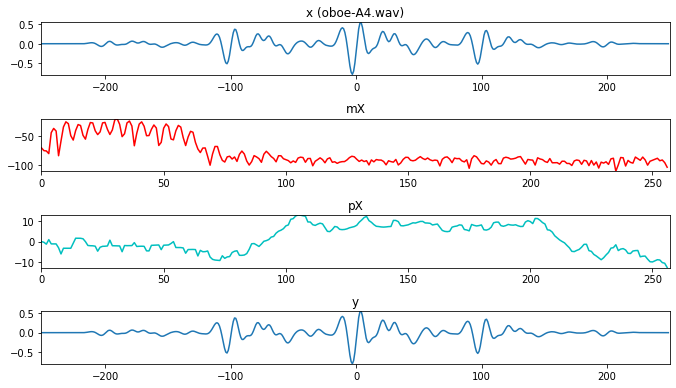

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import time, os, sys
path= r"C:\Users\Public\Documents\DSP\sms-tools-master\software\models"
#sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), path))
if '__file__' in vars():
    wk_dir = os.path.dirname(os.path.realpath('__file__'))
else:
    print('We are running the script interactively')

import dftModel as DFT
import utilFunctions as UF
from scipy.io.wavfile import read
from scipy.fftpack import fft, ifft
import math

(fs, x) = UF.wavread(r'C:\Users\Public\Documents\DSP\sms-tools-master\sounds\oboe-A4.wav')
w = np.hanning(501)
N = 512
pin = 5000
hM1 = int(math.floor((w.size+1)/2)) 
hM2 = int(math.floor(w.size/2))  
x1 = x[pin-hM1:pin+hM2]
mX, pX = DFT.dftAnal(x1, w, N)
y = DFT.dftSynth(mX, pX, w.size)*sum(w)

plt.figure(1, figsize=(9.5, 5.5))
plt.subplot(4,1,1)
plt.plot(np.arange(-hM1, hM2), x1*w, lw=1.5)
plt.axis([-hM1, hM2, min(x1), max(x1)])
plt.title('x (oboe-A4.wav)')

plt.subplot(4,1,2)
plt.plot(np.arange(mX.size), mX, 'r', lw=1.5)
plt.axis([0,mX.size,min(mX),max(mX)])
plt.title ('mX')

plt.subplot(4,1,3)
plt.plot(np.arange(pX.size), pX, 'c', lw=1.5)
plt.axis([0,pX.size,min(pX),max(pX)])
plt.title ('pX')

plt.subplot(4,1,4)
plt.plot(np.arange(-hM1, hM2), y, lw=1.5)
plt.axis([-hM1, hM2, min(y), max(y)])
plt.title('y')

plt.tight_layout()
plt.savefig('anal-synth.png')
plt.show()


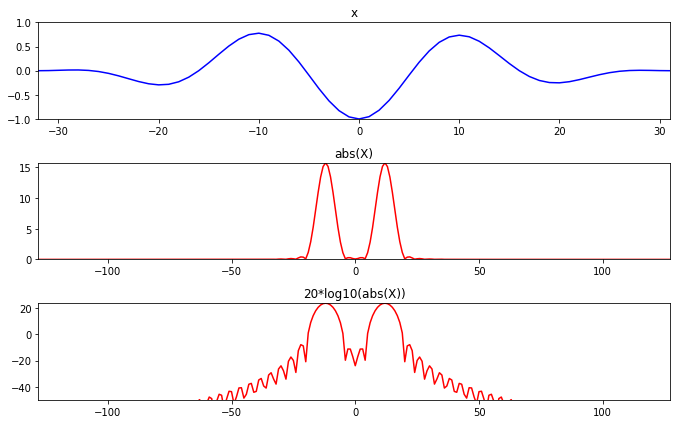

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hamming
from scipy.fftpack import fft, fftshift

plt.figure(1, figsize=(9.5, 6))
M= 64
N = 256
x = np.cos(2*np.pi*3/M*np.arange(M)) * np.hanning(M)

plt.subplot(3,1,1)
plt.plot(np.arange(-M/2.0,M/2), x, 'b', lw=1.5)
plt.axis([-M/2,M/2-1,-1,1])
plt.title('x')


mX = np.abs(fftshift(fft(x, N)))
plt.subplot(3,1,2)
plt.plot(np.arange(-N/2.0,N/2), mX, 'r', lw=1.5)
plt.axis([-N/2,N/2-1,0,max(mX)])
plt.title('abs(X)')

mX = 20 * np.log10(mX)
plt.subplot(3,1,3)
plt.plot(np.arange(-N/2.0,N/2), mX, 'r', lw=1.5)
plt.axis([-N/2,N/2-1,-50,max(mX)])
plt.title('20*log10(abs(X))')

plt.tight_layout()
plt.savefig('decibels.png')
plt.show()



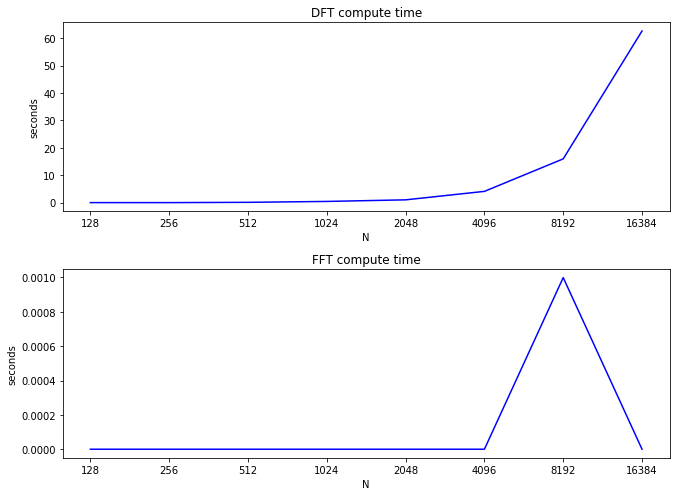

In [181]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import time

timeDFT = np.array([])
timeFFT = np.array([])
Ns = 2**np.arange(7,15)
for N in Ns:
	x = np.random.rand(N)
	X = np.array([])
	str_time = time.time()
	for k in range(N):
		s = np.exp(1j*2*np.pi*k/N*np.arange(N))
		X = np.append(X, sum(x*np.conjugate(s)))
	timeDFT = np.append(timeDFT, time.time()-str_time)

x = np.random.rand(120)
X = fft(x)
for N in Ns:
	x = np.random.rand(N)
	str_time = time.time()
	X = fft(x)
	timeFFT = np.append(timeFFT, time.time()-str_time)

plt.figure(1, figsize=(9.5, 7))
plt.subplot(2,1,1)
plt.plot(timeDFT, 'b', lw=1.5)
plt.title('DFT compute time')
plt.xlabel('N')
plt.ylabel('seconds')
plt.xticks(np.arange(len(Ns)), Ns)
plt.subplot(2,1,2)
plt.plot(timeFFT, 'b', lw=1.5)
plt.title('FFT compute time')
plt.xlabel('N')
plt.ylabel('seconds')
plt.xticks(np.arange(len(Ns)), Ns)

plt.tight_layout()
plt.savefig('dft-fft.png')
plt.show()
